In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga
import sys
import os
from contextlib import redirect_stdout
import io

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import mesh
import geometry
import material
from stress_strain_analysis import stress_strain_analysis

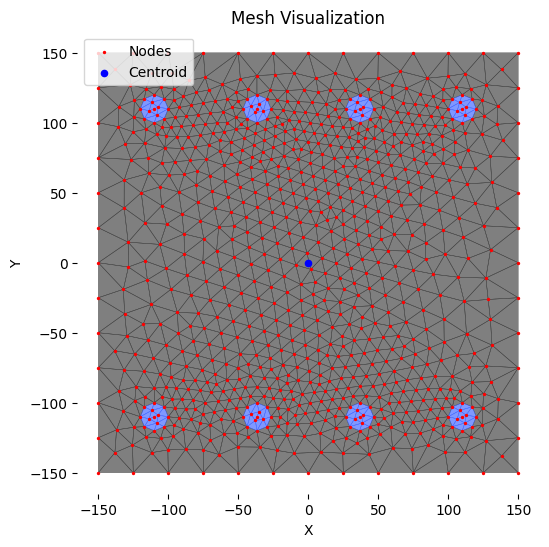

In [2]:
ReinforcedConcrete = geometry.ReinforcedConcreteColumn(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 20,
                                                       rebar_spacing  = 50)
Mesh = mesh.Mesh(ReinforcedConcrete, "triangle", 25)
Mesh.plot()

In [3]:
Analysis = stress_strain_analysis(Mesh, Nx=0, My=100)

[100, 100, 200, 200, 300, 300, 400, 400, 500, 500, 600, 600, 700, 700, 800, 800, 900, 900, 1000, 1000]
 The best solution found:                                                                           
 [-9.82323185e-04  1.75923509e-05 -4.21033731e-05]

 Objective function:
 1035.9718407221164


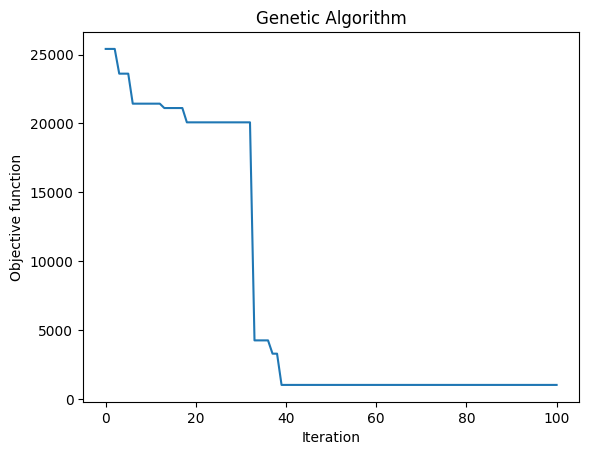

 The best solution found:                                                                           
 [-7.71428601e-04  1.52510114e-05  1.39121869e-05]

 Objective function:
 376.3176059532559


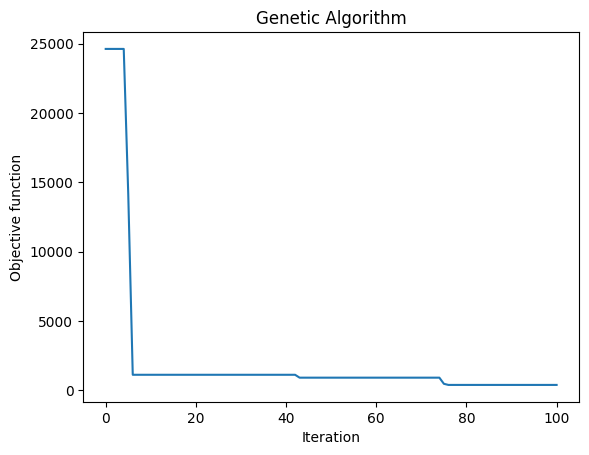

 The best solution found:                                                                           
 [-3.04249827e-04  5.84137555e-06  2.65674604e-05]

 Objective function:
 12.877574237117948


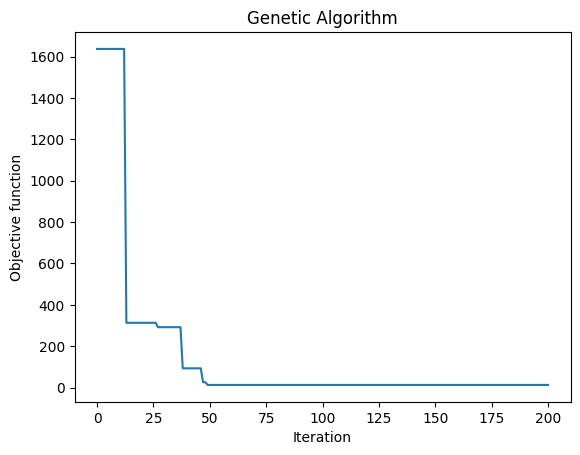

 The best solution found:                                                                           
 [-9.93343522e-04  1.72213768e-05  9.87328791e-05]

 Objective function:
 0.07731104794534584


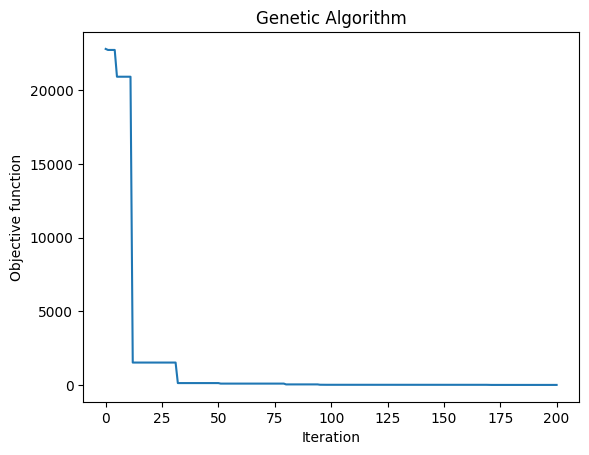

 The best solution found:                                                                           
 [-9.47825277e-04 -1.67828554e-05 -5.53106953e-06]

 Objective function:
 5.270894571334703


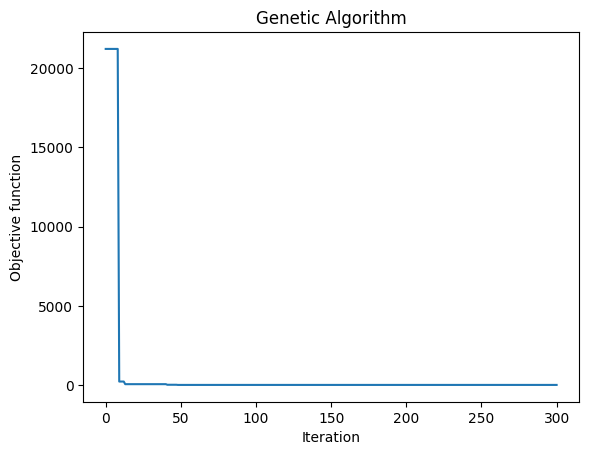

 The best solution found:                                                                           
 [-7.55728868e-04 -1.46535901e-05  2.59944545e-05]

 Objective function:
 5.225858883336897


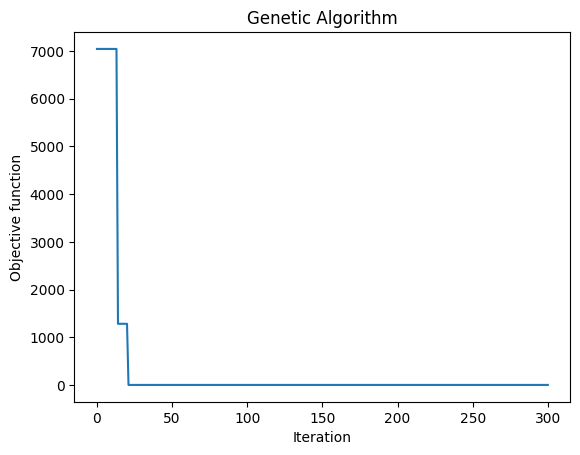

 The best solution found:                                                                           
 [-7.06823258e-04  1.36386060e-05 -7.05614640e-05]

 Objective function:
 1.3006339340180755


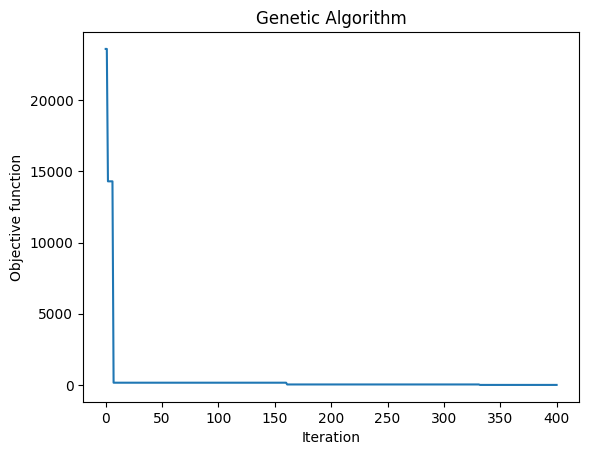

 The best solution found:                                                                           
 [-4.85782227e-04  9.24713562e-06 -4.76223512e-06]

 Objective function:
 2.460468464675225


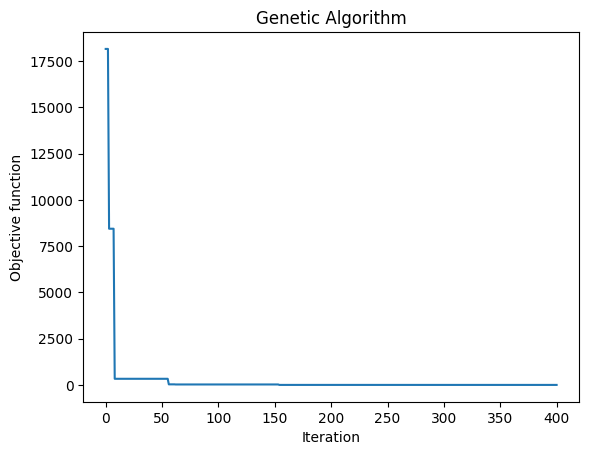

 The best solution found:                                                                           
 [-8.28427466e-04 -1.56086353e-05 -9.59372298e-06]

 Objective function:
 5.184821729955396


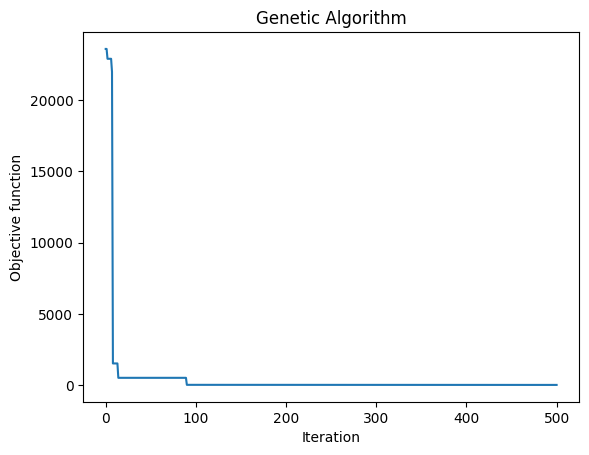

 The best solution found:                                                                           
 [-8.56172090e-04 -1.58844499e-05 -7.75321159e-05]

 Objective function:
 5.2603009787678605


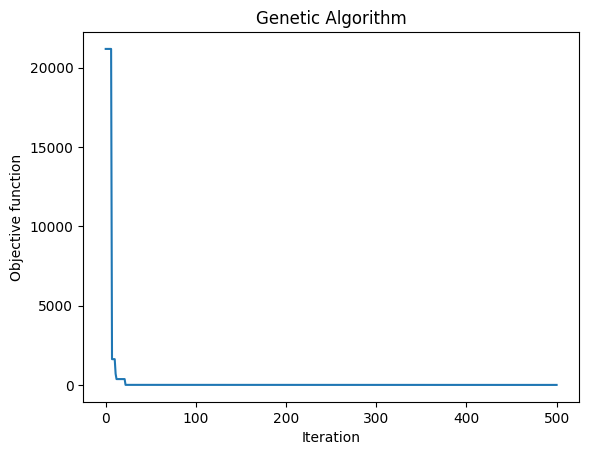

 The best solution found:                                                                           
 [-4.78714662e-04  9.14223638e-06  5.04678008e-05]

 Objective function:
 0.05223390548845939


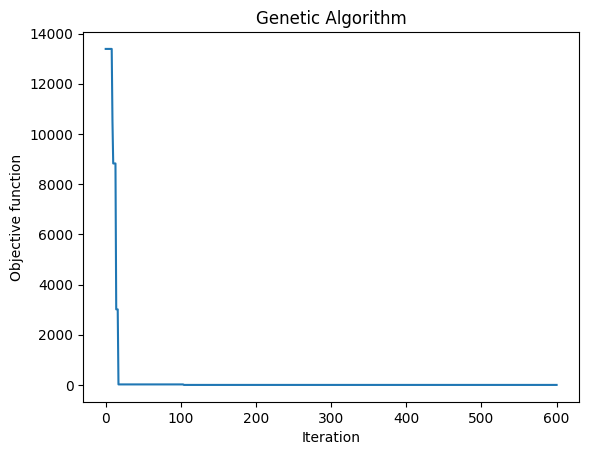

 The best solution found:                                                                           
 [-1.62061305e-04  3.06744369e-06  4.24244522e-05]

 Objective function:
 0.5542069214865214


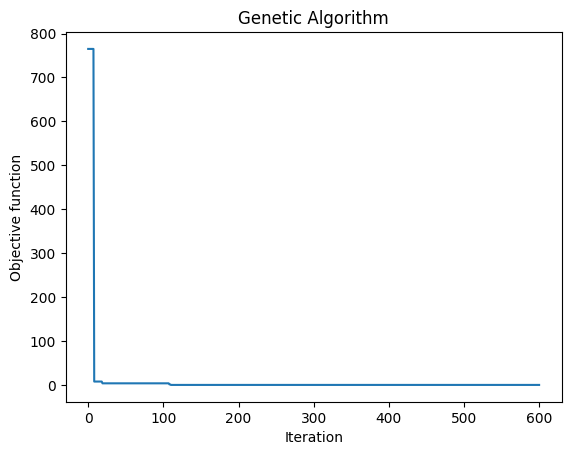

 The best solution found:                                                                           
 [-9.98913108e-04 -1.72823536e-05 -3.40976910e-05]

 Objective function:
 5.445377858395927


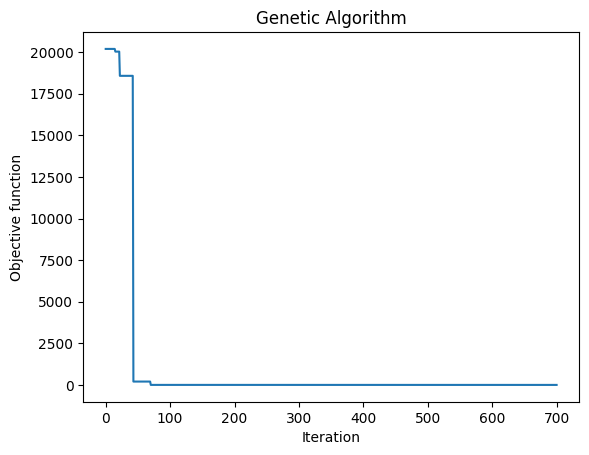

 The best solution found:                                                                           
 [-8.01381354e-05  1.63989002e-06  8.80877152e-05]

 Objective function:
 20.609370692285754


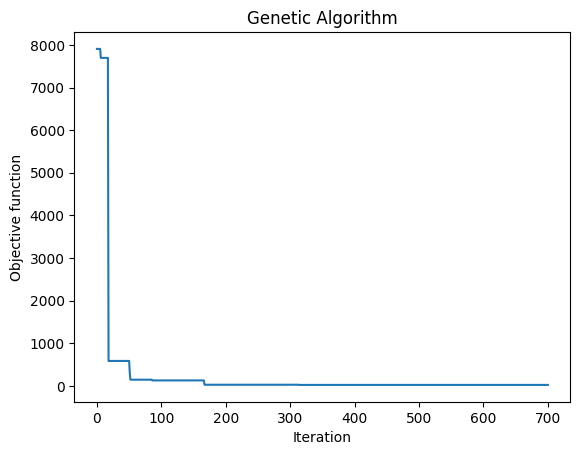

 The best solution found:                                                                           
 [-2.62708147e-04  4.98257974e-06 -1.79580223e-05]

 Objective function:
 0.3861887756501521


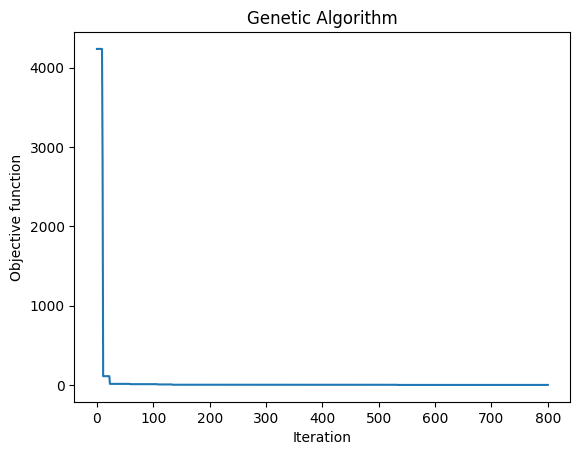

 The best solution found:                                                                           
 [-9.49054136e-04 -1.67877031e-05 -7.94745529e-05]

 Objective function:
 5.218385814935865


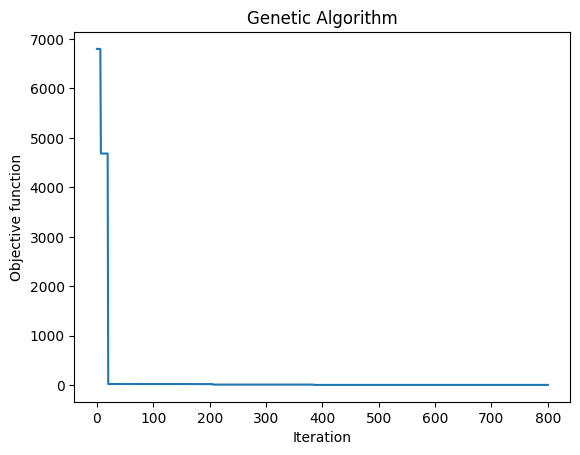

 The best solution found:                                                                           
 [-3.28413431e-04 -6.25226773e-06 -3.75795943e-05]

 Objective function:
 2.870821134931586


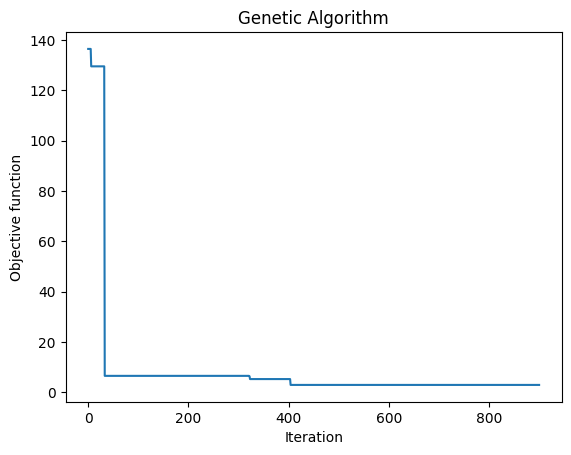

 The best solution found:                                                                           
 [-8.85007315e-04  1.61547458e-05 -4.81561293e-05]

 Objective function:
 0.2538717467624573


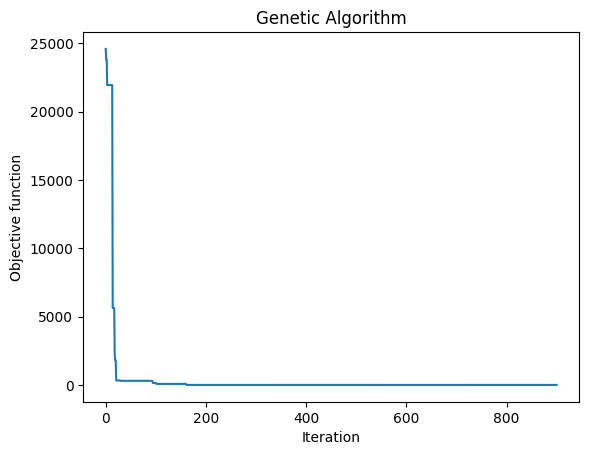

 The best solution found:                                                                           
 [-9.83603777e-04 -1.71260244e-05 -5.27627673e-05]

 Objective function:
 5.19161493257114


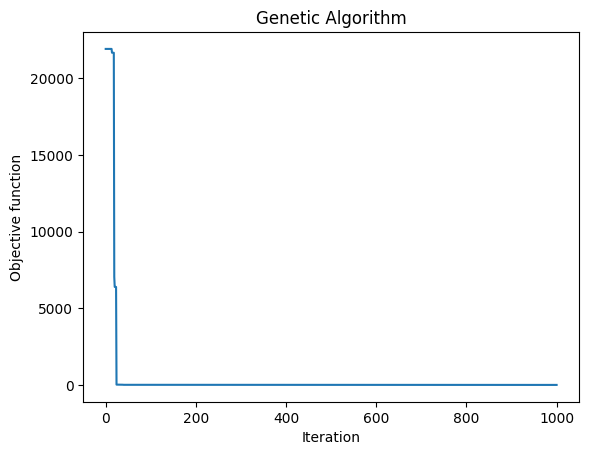

 The best solution found:                                                                           
 [-9.18399336e-04  1.64888864e-05 -9.01667004e-05]

 Objective function:
 0.0753026572603872


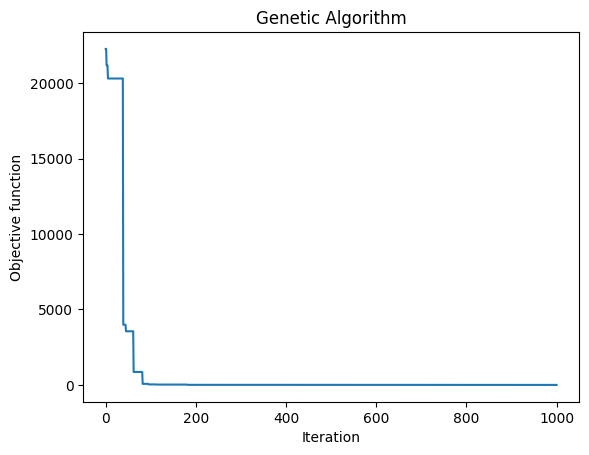

In [10]:
varbound=np.array([[- 0.001,  0.001],
                   [-0.0001, 0.0001],
                   [-0.0001, 0.0001]])

size = [i * 100 for i in range(1,11) for _ in range(2)]
print(size)
O = []

for s in size:
    algorithm_param = {'max_num_iteration': s,\
                   'population_size':20,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

    model=ga(function=Analysis.find_strain_and_curvature,
            dimension=3,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param)

    model.run()
    O.append(model.report[-1])

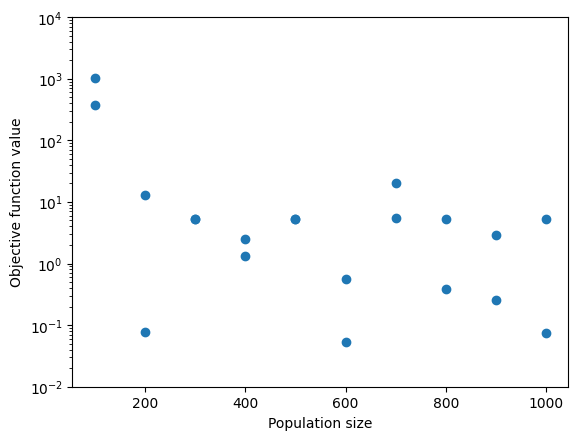

In [19]:
plt.scatter(size, O)
plt.ylim(0.01, 10000)
plt.xlabel('Population size')
plt.ylabel('Objective function value')
plt.yscale('log')
plt.show()